In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Exercice

- Générer $n=50$ observations i.i.d. de loi $\mathcal{E}(\theta)$ pour $\theta=2$.
- Tracer sur un même graphe la fonction de répartition empirique et la fonction de répartition d'une loi $\mathcal{E}(2)$, $\mathbb{P}(X\leq x)=(1-e^{-\theta x})\mathbf{1}_{x\geq 0}$.
- Donner l'estimateur du maximum de vraisemblance de $\theta$, on le note $\hat \theta_{n}$. Sur le graphe précédent ajouter $x\mapsto (1-e^{-\hat\theta_{n} x})\mathbf{1}_{x\geq 0}$. Comparer.
- Faire varier la taille d'échantillon $n$ et la loi considérée. (On pourra aussi considérer des lois discrètes).

In [24]:
# Générer 50 observations i.i.d. de loi exponentielle(2)
n = 50
X = st.expon.rvs(scale = 0.5, size = n)

<p style="page-break-after:always;"></p>

### Fonction de répartition empirique

- Tracer sur un même graphe la fonction de répartition empirique et la fonction de répartition d'une loi $\mathcal{E}(2)$, $\mathbb{P}(X\leq x)=(1-e^{-\theta x})\mathbf{1}_{x\geq 0}$.

$P(X_i < x)$ est estimée par la fréquence $\frac{1}{n}\Sigma1_{X_i <x}$ qui est la moyenne des cas où $X_i < x$ 

écrit en Python par :  (X <= x).mean( )

En effet le test (X <= x) renvoie un boolean 1 if True, O sinon. Reste à 
renvoyer la moyenne des 1.


In [25]:
# Fonction de répartition P(X< x) estimée par la fréquence des X < x
# avec en paramètre la variable X et la grille grid
def F_hat(X, grid): 
    Fn = np.ones_like(grid) # initialisation de l'array avec des 1
    k = int(np.sum(Fn)) # nombre d'éléments de la grille
    for i in np.arange(k):
        Fn[i] = (X <= grid[i]).mean() # La FdR empirique au point i
    return Fn

<function matplotlib.pyplot.show(close=None, block=None)>

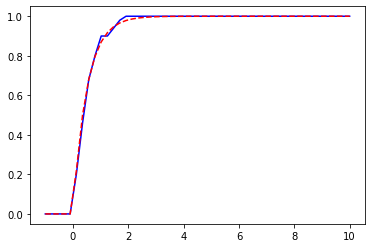

In [26]:
grid = np.linspace(-1,10,n)
Fn = F_hat(X, grid)
plt.plot(grid, Fn, 'b-')
plt.plot(grid, st.expon.cdf(grid, scale = 0.5), 'r--')
plt.show

<p style="page-break-after:always;"></p>

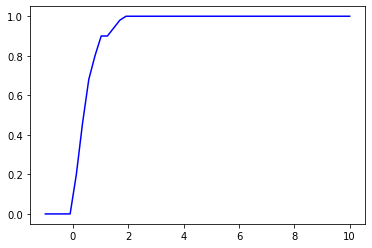

In [27]:
# Autre méthode pour tracer la fonction de répartition empirique
# en utilisant à nouveau l'astuce (x<y).mean()
x = X.reshape((-1,1))
y = grid.reshape((1,-1))
Fn = (x <y).mean(axis = 0)
plt.plot(grid, Fn, 'b-')

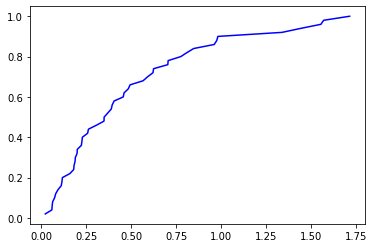

In [31]:
# Pour un plot plus rapide
grid = np.linspace(-1,10,n)
A = X.copy()
A.sort()
plt.plot(A, np.cumsum(np.ones_like(A))/n, 'b')

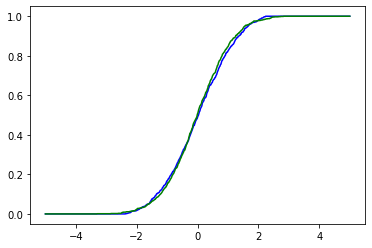

In [6]:
n = 1000
U = st.uniform.rvs(-np.sqrt(6)/2,
                   np.sqrt(6),
                   n) + st.uniform.rvs(-np.sqrt(6)/2,
                                       np.sqrt(6),n)# Attention aux  param
# loc, loc+scale
N = st.norm.rvs(0,1,n)

grid = np.linspace(-5,5,1000)
FnU = F_hat(U, grid)
FnN = F_hat(N, grid)
plt.plot(grid, FnU, 'b-')
plt.plot(grid, FnN, 'g-')
plt.show()

Et les densité associées

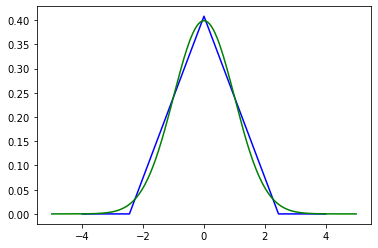

In [7]:
plt.plot(np.array([-4,-np.sqrt(6),0,np.sqrt(6),4]), np.array([0,0,1/np.sqrt(6),0,0]), 'b-')
plt.plot(grid, st.norm.pdf(grid,0,1), 'g-')
plt.show()

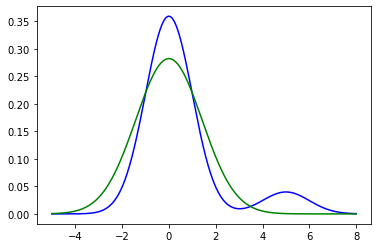

In [8]:
grid = np.linspace(-5,8,1000)
p = 0.9
plt.plot(grid, p*st.norm.pdf(grid,0,1)+(1-p)*st.norm.pdf(grid,5,1), 'b-')
plt.plot(grid, st.norm.pdf(grid,0,np.sqrt(2)), 'g-')
plt.show()

(-2.0, 6.0)

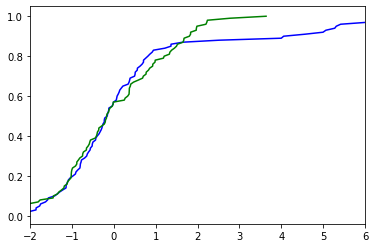

In [9]:
n = 100
A = st.norm.rvs(0,np.sqrt(2),n)
A.sort()

U = st.uniform.rvs(0,1,n)
X = (U < p)*st.norm.rvs(0,1,n) + (U > p)*st.norm.rvs(5,1,n)
X.sort()

plt.xlim(-2, 6)
plt.plot(X, np.cumsum(np.ones_like(A))/n, 'b-')
plt.plot(A, np.cumsum(np.ones_like(A))/n, 'g')
plt.show()

1. Simuler un  ́echantillon de taille n = 200 d’une loi Beta de param`etres (2, 2).
2. Utiliser le noyau normal. Faire varier le choix de h ; bandwidth. Que constatez-vous ?
3. Trouver une valeur de h qui semble adapt ́ee (on pourra calculer l’erreur quadratique).
4. Maintenant, calculer l’estimateur `a noyaux avec un  ́echantillon de taille 20000 pour le choix de h pr ́ec ́edent Que constatez-vous ? Conclure.

In [69]:
# Les packages
from scipy.stats import kde
from statsmodels.nonparametric.kde import KDEUnivariate

1. Simuler un échantillon de taille n = 200 d'une loi Beta de paramètres (2,2)

In [70]:
X = st.beta.rvs(a=2, b=2, size = 200)

2. Utiliser le noyau normal. Faire varier le choix de h (bandwith). Que constatez-vous ?

Kernel Density Estimation (KDE)

Text(0.5, 1.0, 'Density Plot of the data')

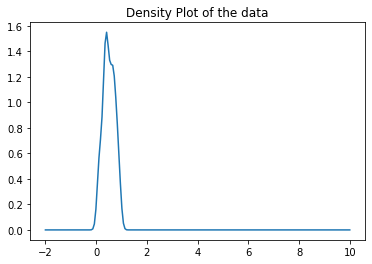

In [71]:
# Méthode kde
density = kde.gaussian_kde(X)
x = np.linspace(-2,10,200)
y=density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.show()

In [63]:
# Méthode KDEUnivariate
# **kwargs to have more parameters in the future
def f_hat(grid, X, h, **kwargs):
    kde = KDEUnivariate(X)
    kde.fit(bw = h, **kwargs)
    return kde.evaluate(grid)

Text(0.5, 1.0, 'Density Plot of the data')

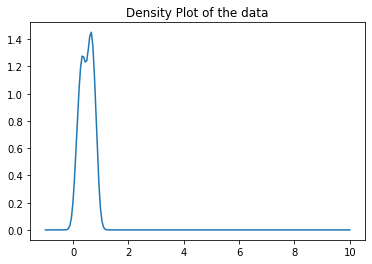

In [65]:
grid = np.linspace(-1,10,200)
plt.plot(grid,f_hat(grid, X = X, h = 0.1))
plt.title("Density Plot of the data")

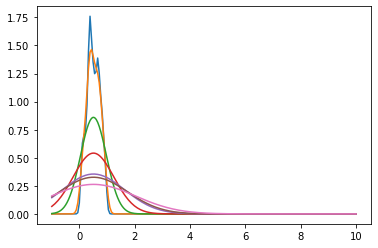

In [78]:
plt.plot(grid,f_hat(grid, X = X, h = 0.05))
plt.plot(grid,f_hat(grid, X = X, h = 0.1))
plt.plot(grid,f_hat(grid, X = X, h = 0.4))
plt.plot(grid,f_hat(grid, X = X, h = 0.7))
plt.plot(grid,f_hat(grid, X = X, h = 1.1))
plt.plot(grid,f_hat(grid, X = X, h = 1.2))
plt.plot(grid,f_hat(grid, X = X, h = 1.5))

Plus la fenêtre de lissage est grande plus la densité est lissée

In [72]:
KDEUnivariate?

In [99]:
from sklearn.neighbors import KernelDensity
import numpy as np
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)

In [95]:
x = np.random.RandomState(17).lognormal(0, 0.3, 10)

In [98]:
# Reshape x
x[:, np.newaxis]

(10, 1)

In [86]:
x_train.shape

(20, 1)